In [8]:
import pandas as pd
data = pd.read_excel('Data.xlsx')
data.head()

,ARPU_M1,ARPU_M2,ARPU_M3,ARPU_M4,ARPU_M5,ARPU_M6,ARPU_M7,Total_revenue
0,2.396495,7.290895,9.898002,29.898002,25.116495,17.164954,5.647493,1.990978e+07
1,2.375161,7.556761,10.665444,30.665444,25.694443,17.060770,4.890484,2.140608e+07
2,2.425906,7.825106,11.935063,34.724731,26.313531,16.942524,4.114179,2.533232e+07
3,2.395383,7.438983,14.132133,34.132133,26.789658,17.651731,4.509247,2.737868e+07
4,2.286102,7.284102,10.717984,30.717984,27.464947,17.035042,3.030982,2.528165e+07


In [9]:
# Calculate summary statistics for the dataset
summary_statistics = data.describe()

# Check for missing values in the dataset
missing_values = data.isnull().sum()

summary_statistics, missing_values


(          ARPU_M1     ARPU_M2  ...     ARPU_M7  Total_revenue
 count  344.000000  353.000000  ...  348.000000   3.600000e+02
 mean     2.535922    7.766441  ...   17.311154   1.652052e+08
 std      1.591613    2.955065  ...   17.446421   1.407613e+08
 min      1.988589    6.791781  ...    0.699275   4.200854e+06
 25%      2.332194    7.334761  ...    4.444256   5.632792e+07
 50%      2.453217    7.571809  ...    6.148974   1.066554e+08
 75%      2.562896    7.825650  ...   28.081932   2.716834e+08
 max     31.819460   61.478297  ...   59.992610   5.391235e+08
 
 [8 rows x 8 columns],
 ARPU_M1          16
 ARPU_M2           7
 ARPU_M3          14
 ARPU_M4          13
 ARPU_M5          16
 ARPU_M6          31
 ARPU_M7          12
 Total_revenue     0
 dtype: int64)

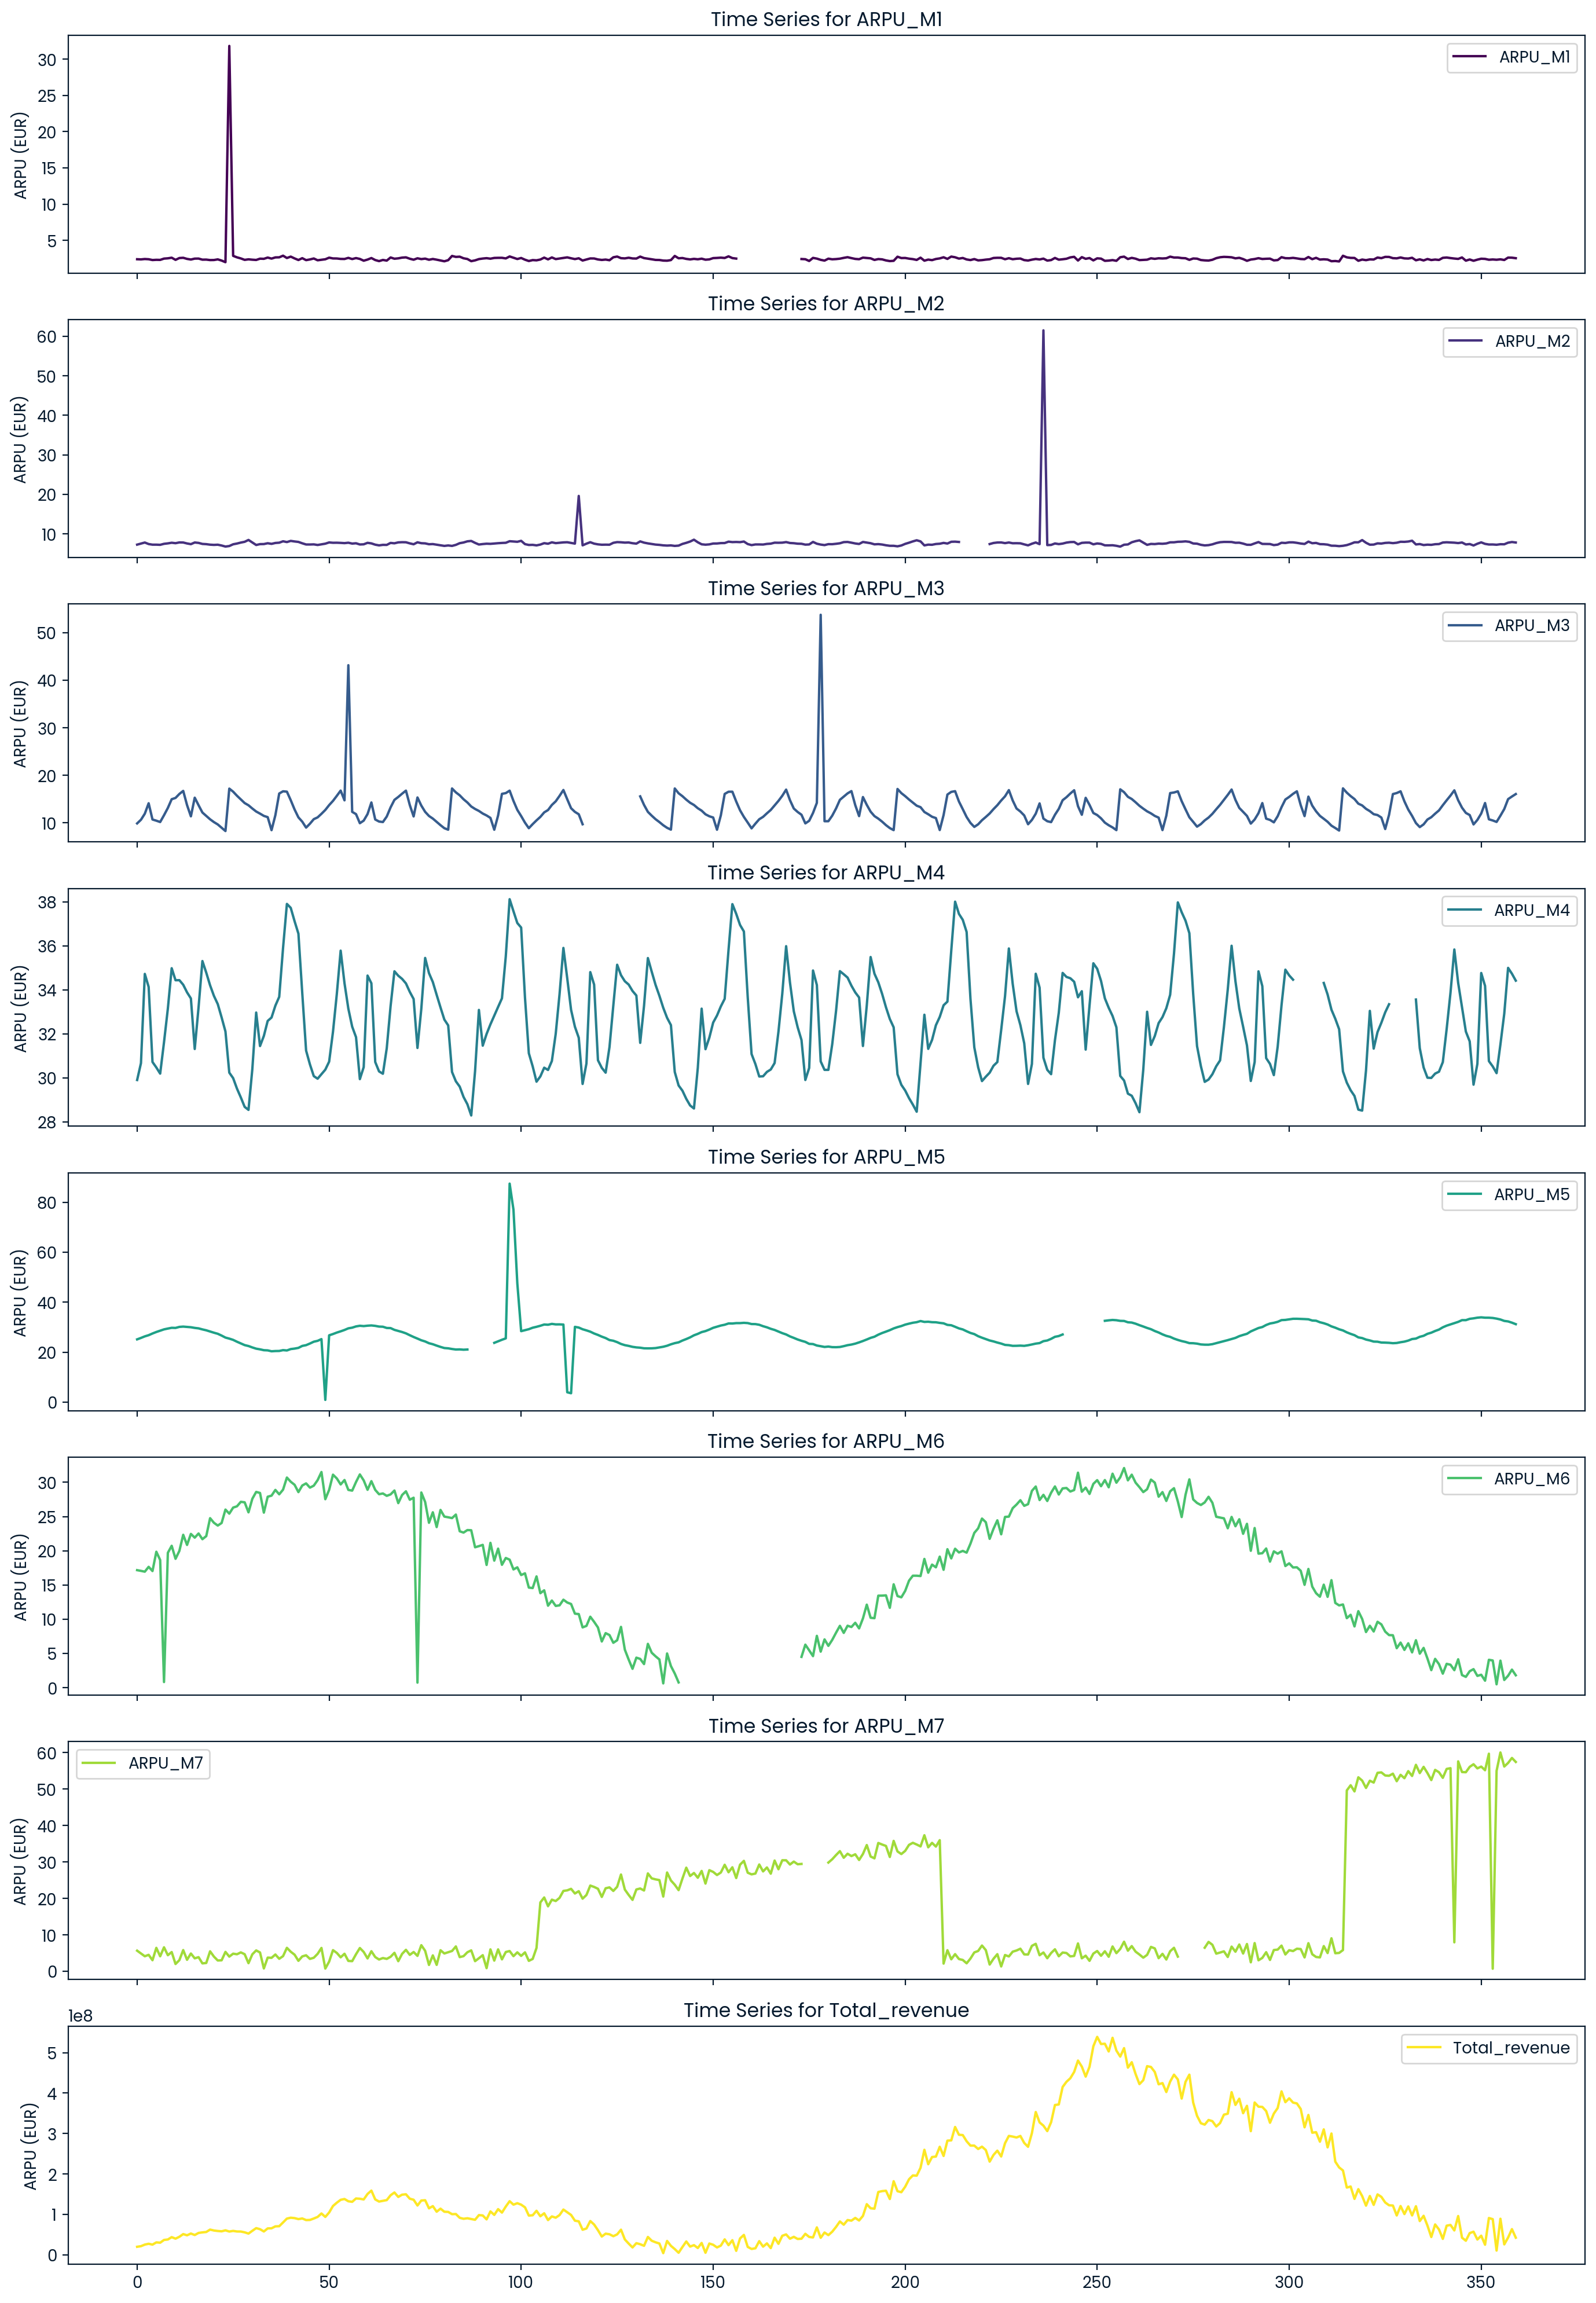

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the plots again with numpy imported
columns = data.columns  # Define columns to iterate over
colors = plt.cm.viridis(np.linspace(0, 1, len(columns)))  # color map for readability

fig, axs = plt.subplots(len(columns), 1, figsize=(14, 20), sharex=True)

for i, col in enumerate(columns):
    axs[i].plot(data.index, data[col], label=f'{col}', color=colors[i])
    axs[i].set_title(f'Time Series for {col}')
    axs[i].set_ylabel('ARPU (EUR)')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [11]:
# Applying linear interpolation to fill missing values in the ARPU columns
data_interpolated = data.copy()
data_interpolated.iloc[:, :-1] = data_interpolated.iloc[:, :-1].interpolate(method='linear')

# Checking if there are any remaining missing values after interpolation
remaining_missing_values = data_interpolated.isnull().sum()

data_interpolated.head(), remaining_missing_values


(    ARPU_M1   ARPU_M2    ARPU_M3  ...    ARPU_M6   ARPU_M7  Total_revenue
 0  2.396495  7.290895   9.898002  ...  17.164954  5.647493   1.990978e+07
 1  2.375161  7.556761  10.665444  ...  17.060770  4.890484   2.140608e+07
 2  2.425906  7.825106  11.935063  ...  16.942524  4.114179   2.533232e+07
 3  2.395383  7.438983  14.132133  ...  17.651731  4.509247   2.737868e+07
 4  2.286102  7.284102  10.717984  ...  17.035042  3.030982   2.528165e+07
 
 [5 rows x 8 columns],
 ARPU_M1          0
 ARPU_M2          0
 ARPU_M3          0
 ARPU_M4          0
 ARPU_M5          0
 ARPU_M6          0
 ARPU_M7          0
 Total_revenue    0
 dtype: int64)

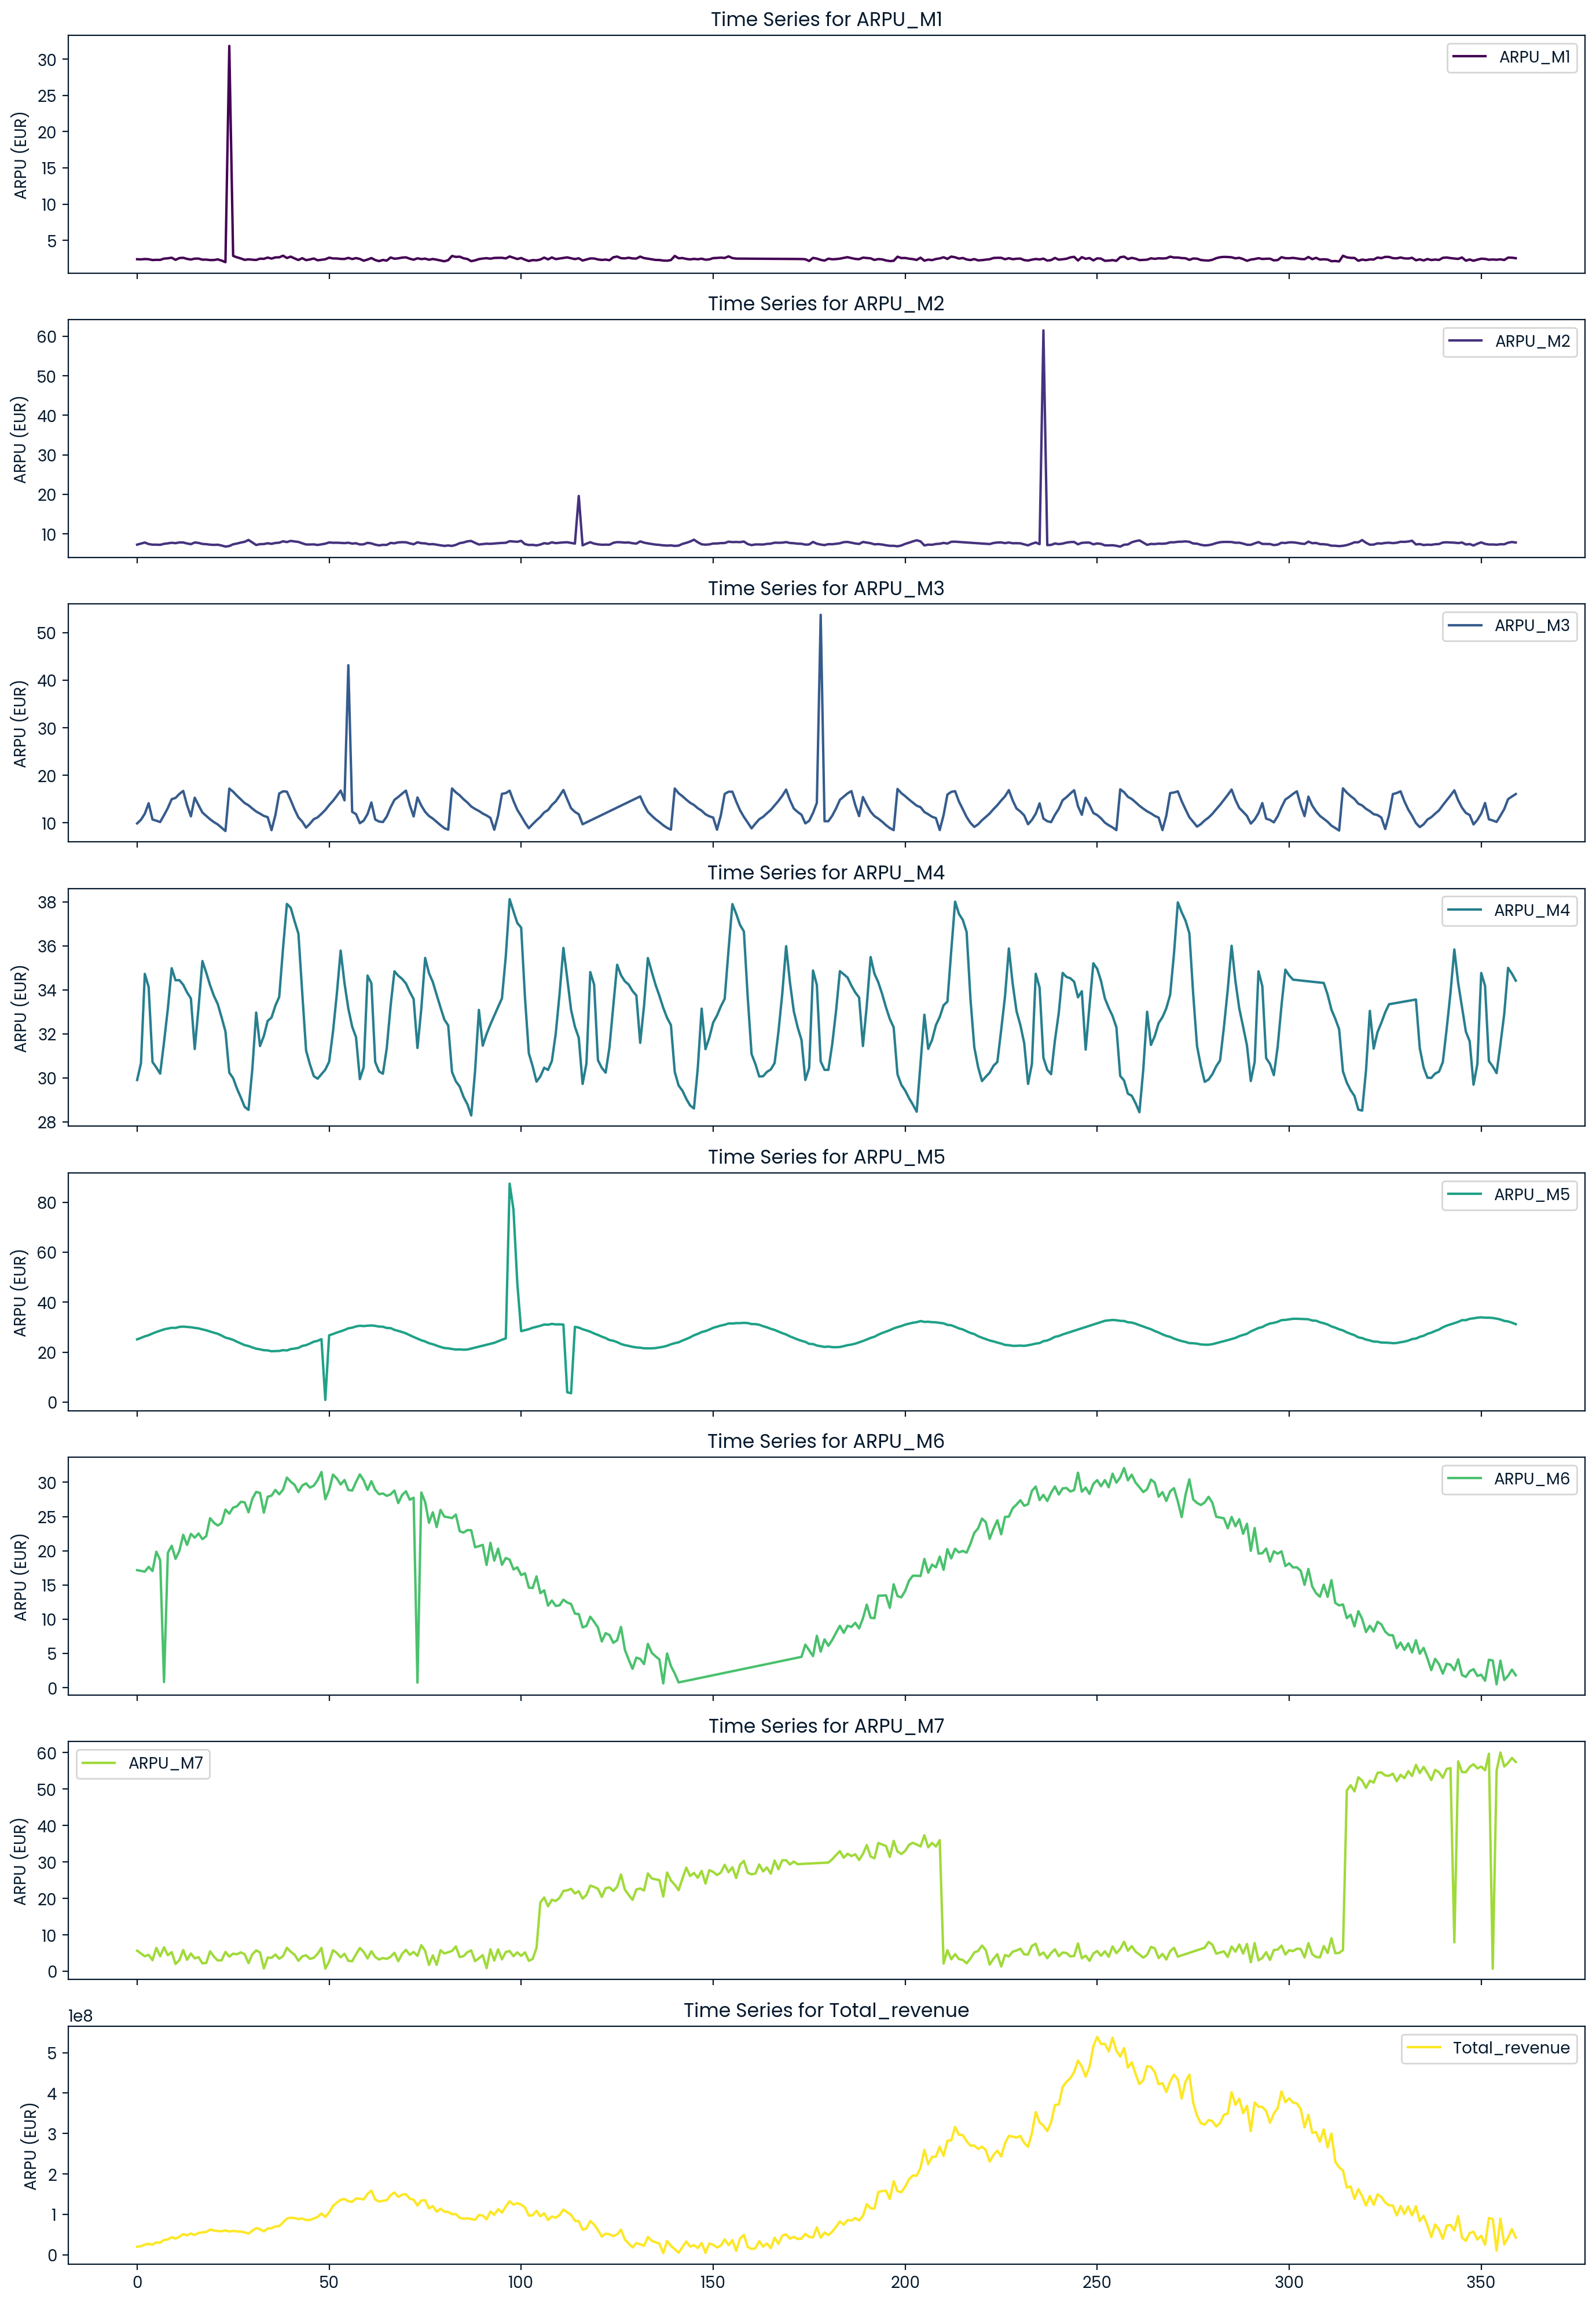

In [12]:
# Creating the plots again with numpy imported
columns = data_interpolated.columns  # Define columns to iterate over
colors = plt.cm.viridis(np.linspace(0, 1, len(columns)))  # color map for readability

fig, axs = plt.subplots(len(columns), 1, figsize=(14, 20), sharex=True)

for i, col in enumerate(columns):
    axs[i].plot(data_interpolated.index, data_interpolated[col], label=f'{col}', color=colors[i])
    axs[i].set_title(f'Time Series for {col}')
    axs[i].set_ylabel('ARPU (EUR)')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [13]:
# Calculate summary statistics for the dataset
data_interpolated.describe()

,ARPU_M1,ARPU_M2,ARPU_M3,ARPU_M4,ARPU_M5,ARPU_M6,ARPU_M7,Total_revenue
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,3.600000e+02
mean,2.532350,7.765172,12.946627,32.580376,27.330847,16.977061,17.314979,1.652052e+08
std,1.555833,2.926184,3.578405,2.210174,6.057673,10.051895,17.296767,1.407613e+08
min,1.988589,6.791781,8.294089,28.285622,0.902111,0.481729,0.699275,4.200854e+06
25%,2.337367,7.338801,10.908047,30.542006,23.788515,7.024877,4.495854,5.632792e+07
50%,2.453742,7.580844,12.414374,32.762992,27.324554,18.069103,6.148974,1.066554e+08
75%,2.559745,7.826457,14.774848,34.238446,30.392903,27.027633,28.680401,2.716834e+08
max,31.819460,61.478297,53.744001,38.122997,87.434736,32.091167,59.992610,5.391235e+08


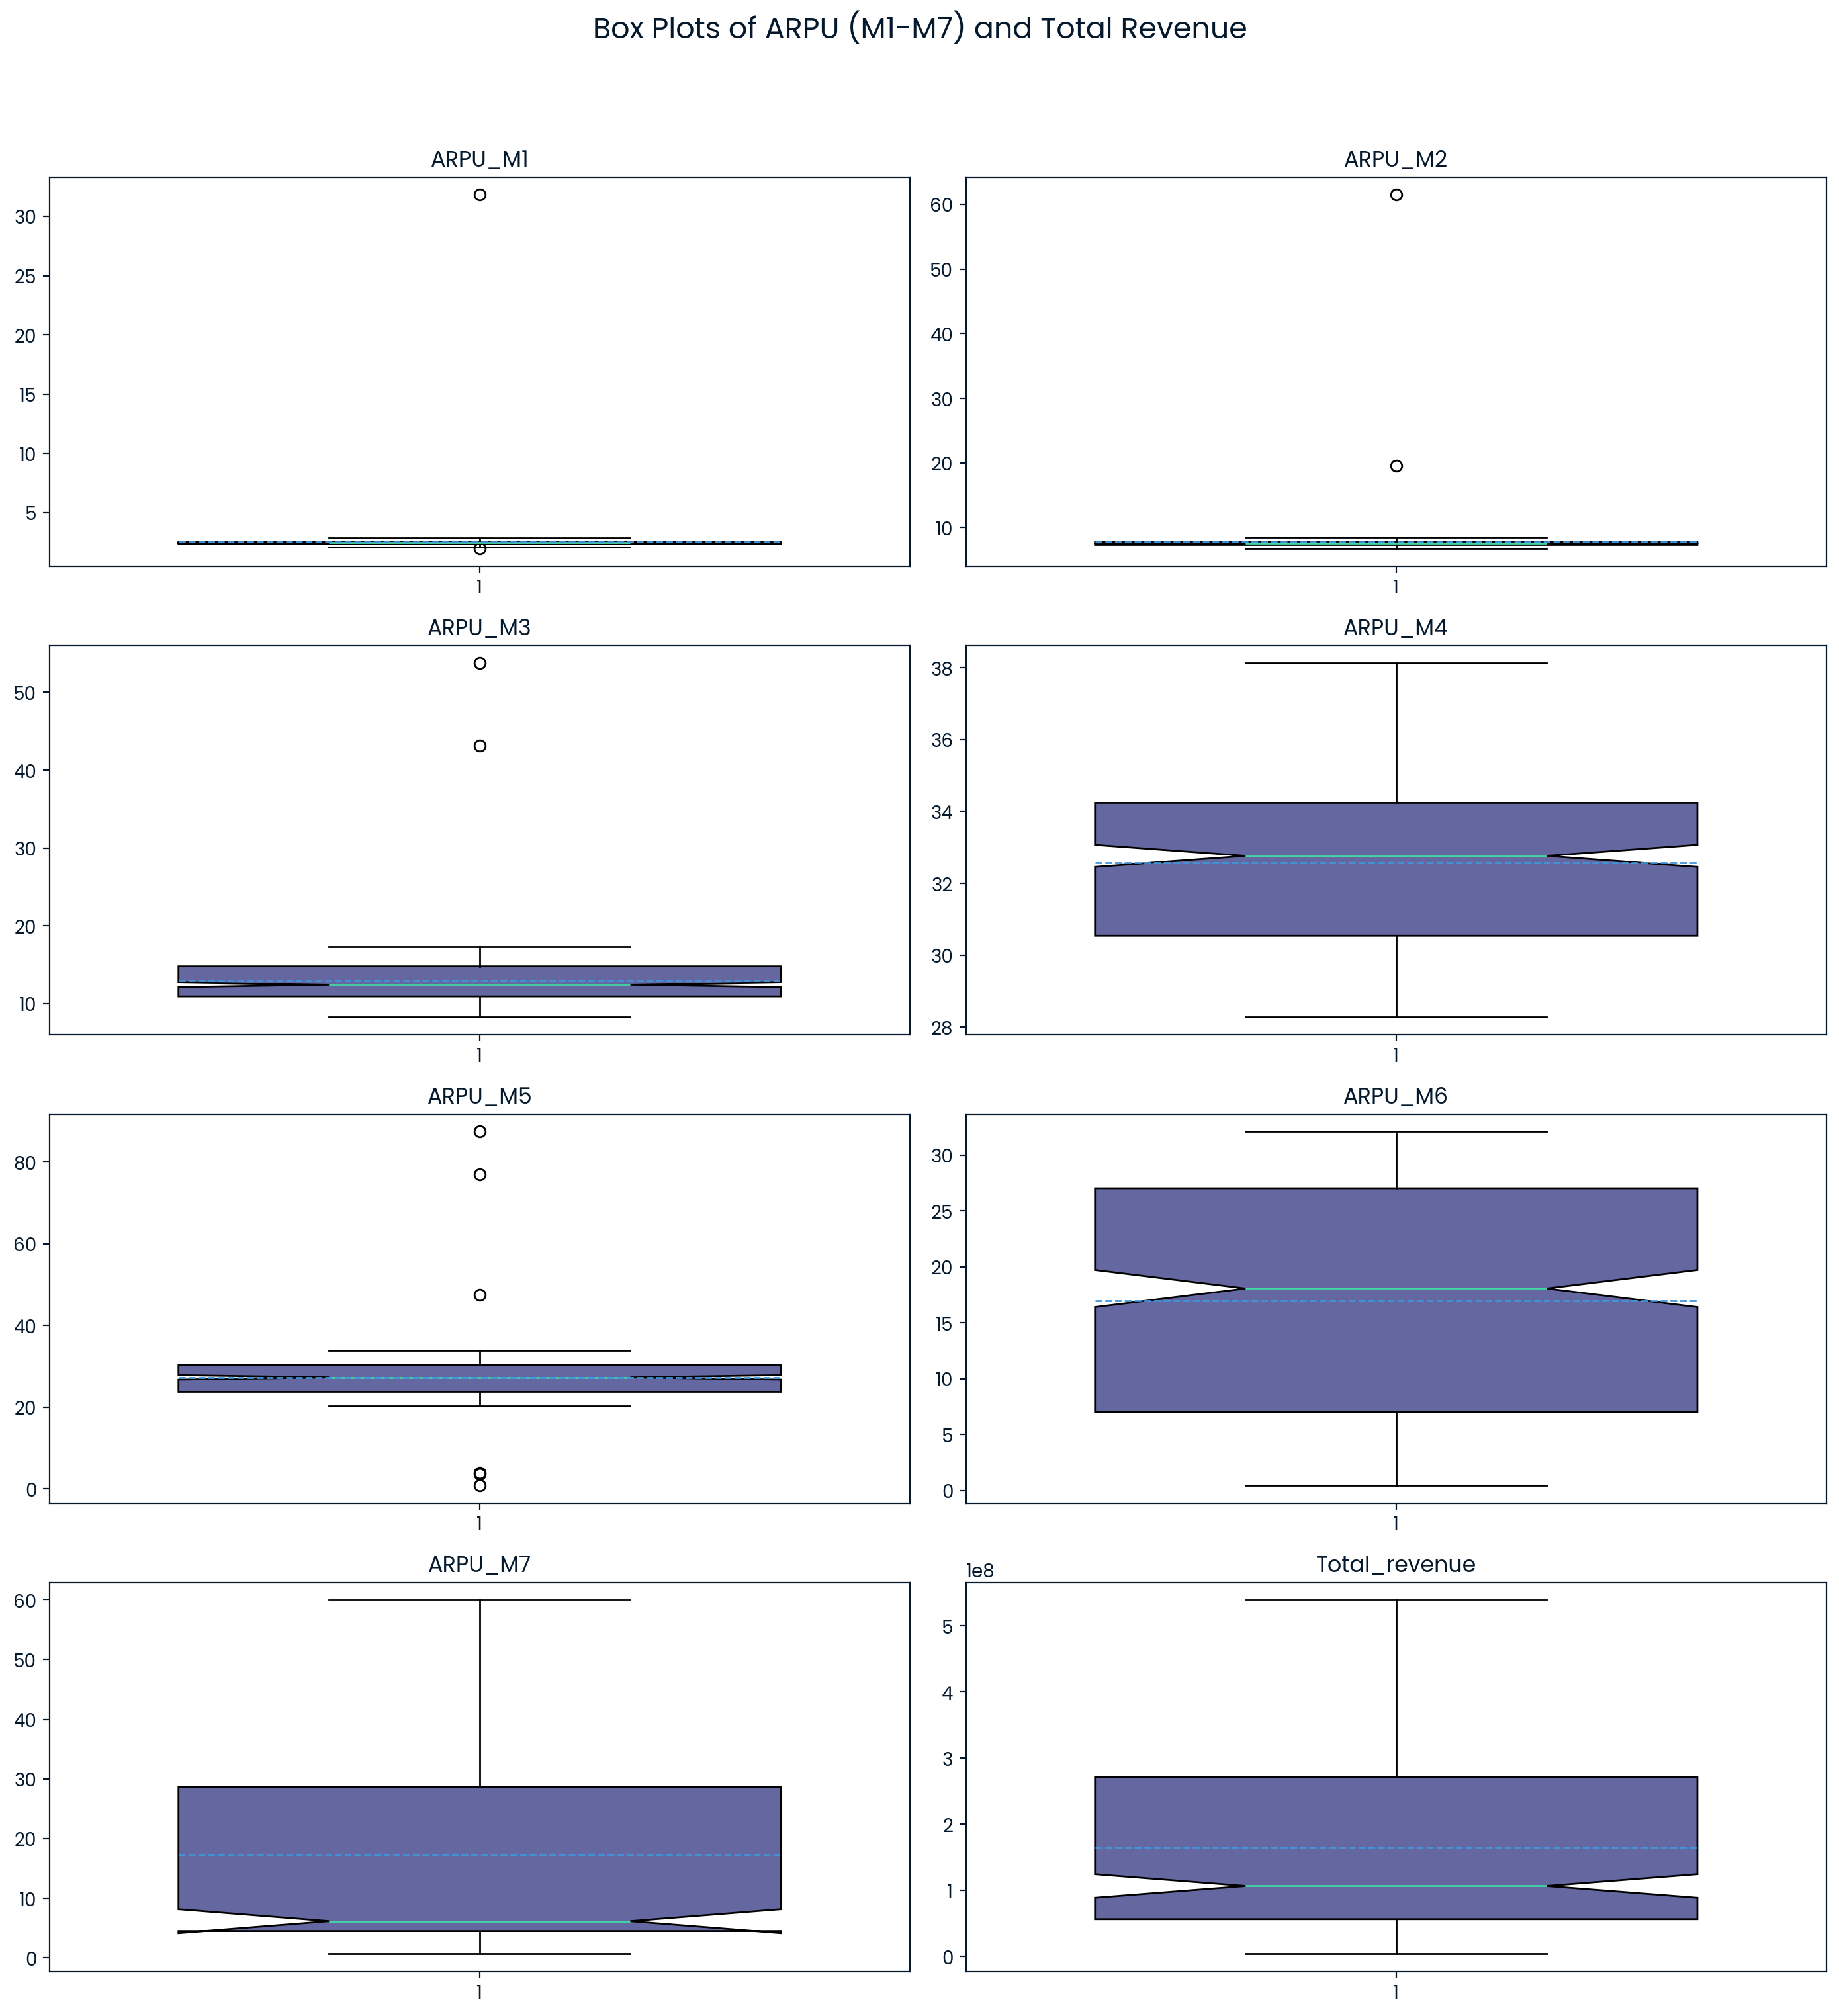

In [14]:
# Plot box plots for each ARPU variable and Total Revenue
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle('Box Plots of ARPU (M1-M7) and Total Revenue', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting loop for box plots
for i, col in enumerate(data_interpolated.columns):
    axes[i].boxplot(data_interpolated[col], patch_artist=True, notch=True, vert=True, widths=0.7, meanline=True, showmeans=True)
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


In [23]:
# Create a series of daily dates
data_interpolated['Date'] = pd.date_range(start='2023-01-01', periods=len(data_interpolated), freq='D')

print(data_interpolated.head())


    ARPU_M1   ARPU_M2    ARPU_M3  ...   ARPU_M7  Total_revenue       Date
0  2.396495  7.290895   9.898002  ...  5.647493   1.990978e+07 2023-01-01
1  2.375161  7.556761  10.665444  ...  4.890484   2.140608e+07 2023-01-02
2  2.425906  7.825106  11.935063  ...  4.114179   2.533232e+07 2023-01-03
3  2.395383  7.438983  14.132133  ...  4.509247   2.737868e+07 2023-01-04
4  2.286102  7.284102  10.717984  ...  3.030982   2.528165e+07 2023-01-05

[5 rows x 9 columns]


In [24]:
# Define the path for the new Excel file
output_path = 'Interpolated_Data.xlsx'

# Save the interpolated data (The best results) to an Excel file
data_interpolated.to_excel(output_path, index=False)
